## Here we test our Baseline models. We test different sklearn classifier on our vector classification task and asses their performance
### Note that this approach is not great since it does not cross-validate but is just train-test splitting.  

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from buildDataset import *


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

C:\Users\line\Desktop\Mauro\2_Preprocessing_Code\amd\prl\dataset.py:8: FutureWarning: The `skimage.morphology.selem` module is deprecated and will be removed in scikit-image 1.0 (`skimage.morphology.selem` has been moved to `skimage.morphology.footprints`).
  from skimage.morphology import selem


In [2]:
root_path =      DATAPATHS["preprocessed"]

#
trainpaths,testpaths = train_test_path_split(root_path) 

# SANITY CHECKS: 1
X_train,y_train = getXYdata(trainpaths,'thickness',root_path,'Z-score')
print(X_train.shape)
sum_ = 0
for path in trainpaths:
    PPocts = pd.read_pickle(path)
    for PPoct in PPocts:
        sum_ += PPoct.image().shape[1]
print(sum_)
X_test,y_test = getXYdata(testpaths,'thickness',root_path,'Z-score')
print(X_test.shape)
sum_ = 0
for path in testpaths:
    PPocts = pd.read_pickle(path)
    for PPoct in PPocts:
        sum_ += PPoct.image().shape[1]
print(sum_)
# SANITY CHECKS: 2
N_train = 0
for path in trainpaths:
    PPocts = pd.read_pickle(path)
    #for PPoct in PPocts:
    N_train += len(PPocts)
print(N_train)

N_test = 0
for path in testpaths:
    PPocts = pd.read_pickle(path)
    N_test += len(PPocts)
print(N_test)

print(N_train/(N_train+N_test))

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
(576768, 5)
576768
(162816, 5)
162816
771
212
0.7843336724313327


# HERE WE ARE TESTING WITH RAW DATA (PIXELS DATA)

In [3]:
X_train, X_test, y_train, y_test = open_dataset(mode ='raw',normmode = 'Z-score',samplingmode = '')
X_traind, X_test, y_traind, y_test = open_dataset(mode ='raw',normmode = 'Z-score',samplingmode = 'D')
X_trainu, X_test, y_trainu, y_test = open_dataset(mode ='raw',normmode = 'Z-score',samplingmode = 'U')

recall_score:  0.2883567097445948
precision_score:  0.4316098276494316
accuracy_score:  0.7505180331541219
f1:  0.3457315953736001


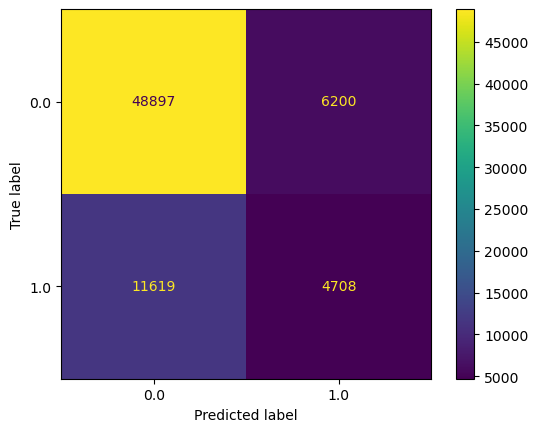

In [4]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_traind, y_traind)
y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

recall_score:  0.15459055552152876
precision_score:  0.4263513513513513
accuracy_score:  0.7591985887096774
f1:  0.22690699869645348


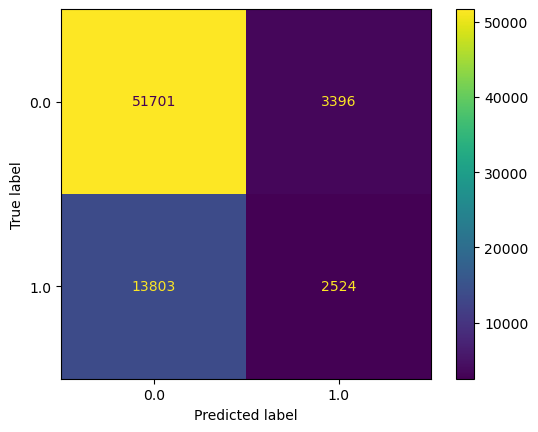

In [5]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_trainu, y_trainu)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


recall_score:  0.47063146934525635
precision_score:  0.4053811659192825
accuracy_score:  0.7211861559139785
f1:  0.4355762145003118


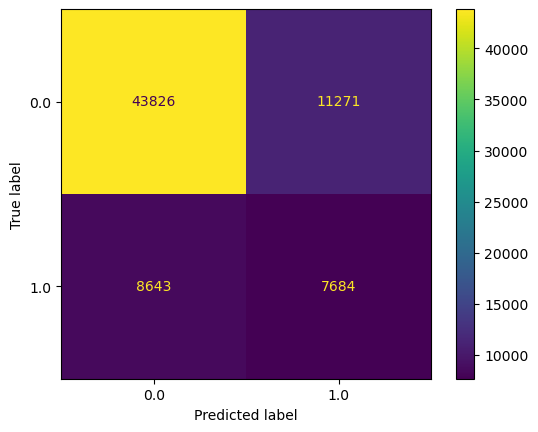

In [8]:
# SVM 
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_trainu, y_trainu)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

recall_score:  0.2443192258222576
precision_score:  0.6089146695161044
accuracy_score:  0.7913866487455197
f1:  0.3487192936445493


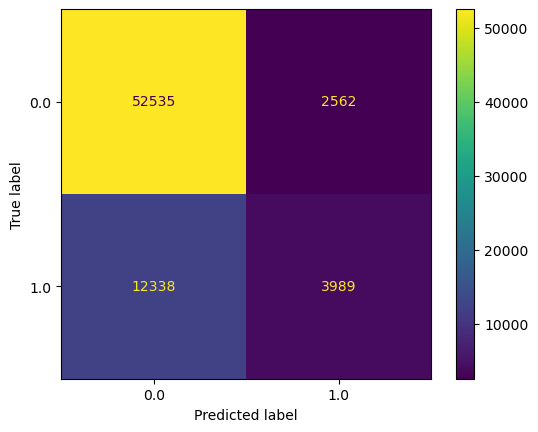

In [9]:
clf = GaussianNB()
clf.fit(X_trainu, y_trainu)
y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

recall_score:  0.15881668402033441
precision_score:  0.4293046357615894
accuracy_score:  0.7594506048387096
f1:  0.2318594357759199


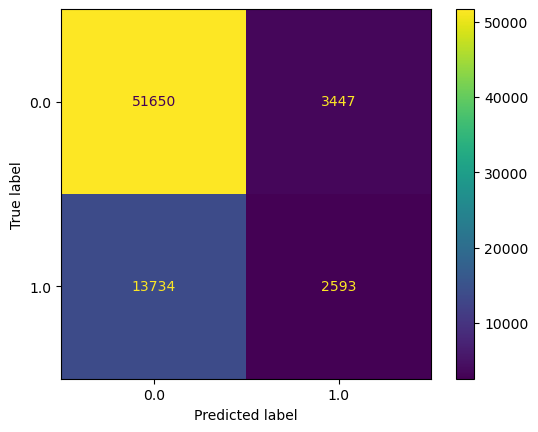

In [10]:
clf = RandomForestClassifier(n_estimators=50,random_state=0)
clf.fit(X_trainu, y_trainu)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

# HERE WE ARE TESTING WITH THICKNESS DATA (FROM THE SEGMENTATIONS DATA)

In [15]:
X_train, X_test, y_train, y_test = open_dataset(mode ='thickness',normmode = 'Z-score',samplingmode = '')
X_traind, X_test, y_traind, y_test = open_dataset(mode ='thickness',normmode = 'Z-score',samplingmode = 'D')
X_trainu, X_test, y_trainu, y_test = open_dataset(mode ='thickness',normmode = 'Z-score',samplingmode = 'U')

recall_score:  0.5564402523427452
precision_score:  0.39144297470808737
accuracy_score:  0.7008568548387096
f1:  0.459581141238365


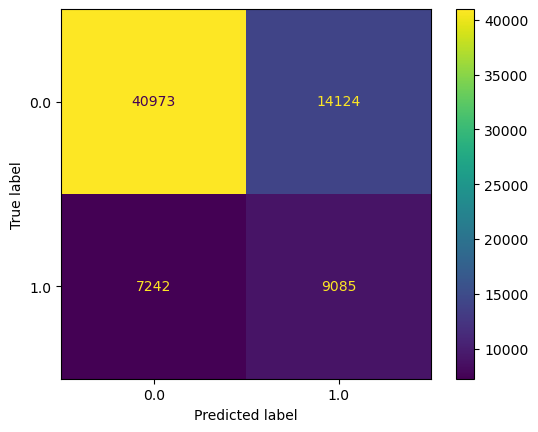

In [12]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_traind, y_traind)


y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

recall_score:  0.4643841489557175
precision_score:  0.3981724608759584
accuracy_score:  0.7171118951612904
f1:  0.428737029602194


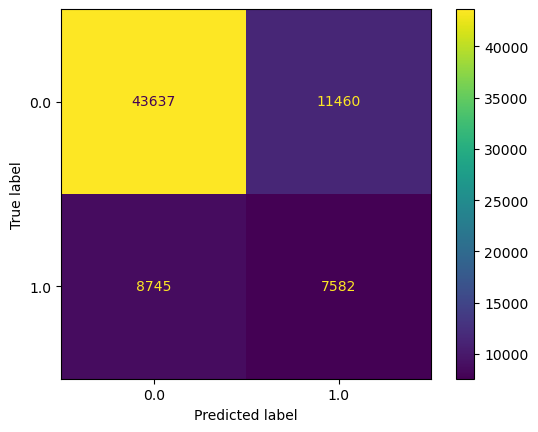

In [13]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_trainu, y_trainu)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

# HERE WE STACK THE TWO DATA SOURCES TO SEE IF IT HELPS

In [16]:
root_path =      r'C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs' 
X_train, X_test, y_train, y_test = open_dataset(mode ='raw',normmode = 'Z-score',samplingmode = '')
X_train2, X_test2, y_train2, y_test2 = open_dataset(mode ='thickness',normmode = 'Z-score',samplingmode = '')
assert np.array_equal(y_train,y_train2)and np.array_equal(y_test,y_test2), "SANITY CHECK FAILED, your arrays are unconsistent"
X_train = np.concatenate((X_train, X_train2), axis=1)
X_test = np.concatenate((X_test, X_test2), axis=1)
print(X_train.shape,X_test.shape)

(668160, 149) (71424, 149)


In [17]:
X_traind,y_traind  = downsample(X_train,y_train)
X_trainu,y_trainu = upsample(X_train,y_train)

recall_score:  0.2998101304587493
precision_score:  0.43503377177390684
accuracy_score:  0.7509380600358423
f1:  0.35498023858733097


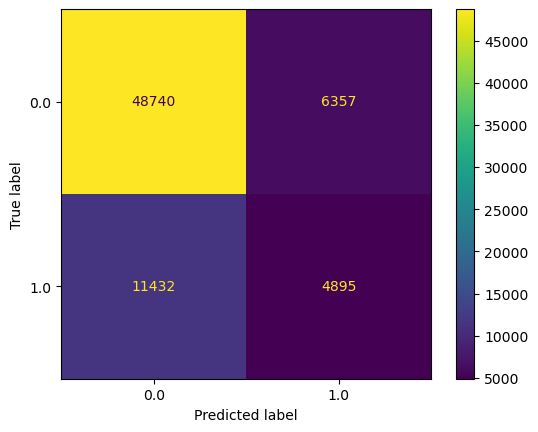

In [18]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_traind, y_traind)


y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

recall_score:  0.15967415936791818
precision_score:  0.41879518072289157
accuracy_score:  0.7572524641577061


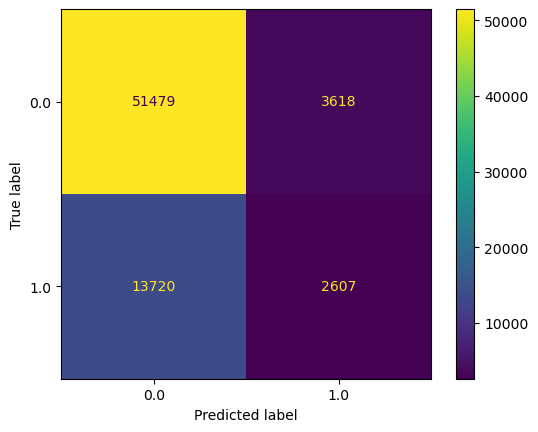

In [19]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_trainu, y_trainu)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()